In [36]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, radians
%matplotlib inline

In [37]:
def perspective(point):
    #point is np array of order (1,3) with x,y and z component
    A = (Prp[2] - Z_vp)/(Prp[2] - point[2])
    B = (Z_vp - point[2])/(Prp[2] - point[2])
    newpoint = point*A + Prp*B
    return newpoint

In [38]:
def drawcube(Pcube):
    #Pcube is an array of order (8, 2) containing projected  2d cordinate (x,y)
    plt.scatter(Pcube[:,0], Pcube[:,1])
    plt.plot(np.append(Pcube[0:4,0], Pcube[0,0]), np.append(Pcube[0:4,1], Pcube[0,1]), c = 'g')
    plt.plot(np.append(Pcube[4:8,0], Pcube[4,0]), np.append(Pcube[4:8,1], Pcube[4,1]), c = 'g')
    for i in range(4):
        x = [Pcube[i,0], Pcube[i+4,0]]
        y = [Pcube[i,1], Pcube[i+4,1]]
        plt.plot(x,y, c = 'g')


In [52]:
def rotate(tx,ty,tz, cube):
    #for rotation about x, y and z axis with angles tx,ty ,tz respectibvely 
    #cube is array of order (8,3) with 8 3d cordinates of actual cube in world space
    A = {'x': radians(tx), 'y': radians(ty), 'z': radians(tz)}
    Rx = np.array([[1,0,0],
                  [0, cos(A['x']), -sin(A['x'])],
                  [0, sin(A['x']), cos(A['x'])]])

    Ry = np.array([[cos(A['y']),0,sin(A['y'])],
                  [0, 1, 0],
                  [-sin(A['y']), 0, cos(A['y'])]])

    Rz = np.array([[cos(A['z']),-sin(A['z']),0],
                  [sin(A['z']), cos(A['z']), 0],
                  [0, 0, 1]])
    #generalize rotation matrix
    R = np.dot(np.dot(Rx, Ry), Rz)
    newcube = np.dot(cube, R)
    return newcube

In [42]:
def pCube(cube):
    #pCube is a function to transform 8 cordinate points of a cube (3d) into the projected cordintes
    Pcube = np.zeros(shape = cube.shape)
    for i in range(cube.shape[0]):
        Pcube[i] = perspective(cube[i])
    return Pcube

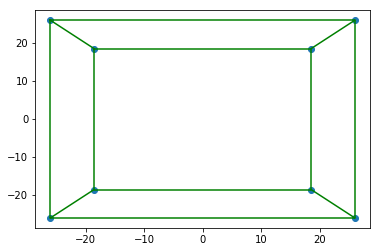

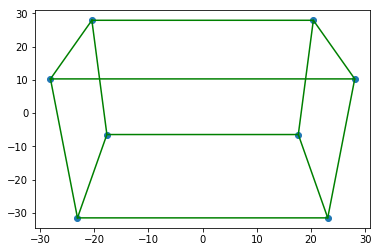

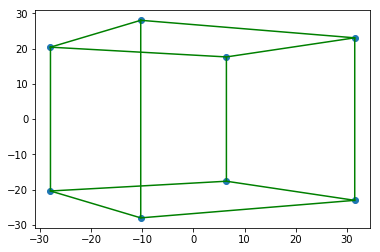

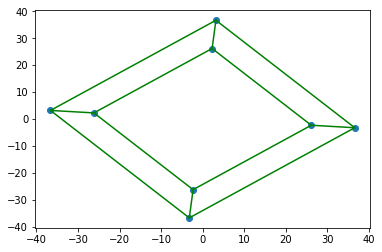

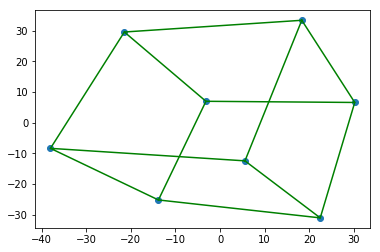

In [64]:
#define and project in perspective
a = 10
cube  = np.array([[0,1,1],
                 [1,1,1],
                 [1,0,1],
                 [0,0,1],
                 [0,1,0],
                 [1,1,0],
                 [1,0,0],
                 [0,0,0]])
cube = a*cube
cube = cube - a/2

Prp = np.array([0,0,-30])

Z_vp = 100

plt.figure('Original Cube')
Pcube = pCube(cube)
drawcube(Pcube)

plt.figure('Rotated about x')
newcube = rotate(30,0,0,cube)
Pcube = pCube(newcube)
drawcube(Pcube)

plt.figure('Rotated about y')
newcube = rotate(0,30,0,cube)
Pcube = pCube(newcube)
drawcube(Pcube)

plt.figure('Rotated about z')
newcube = rotate(0,0,50,cube)
Pcube = pCube(newcube)
drawcube(Pcube)

plt.figure('Rotated about x,y,z')
newcube = rotate(50,50,50,cube)
Pcube = pCube(newcube)
drawcube(Pcube)